In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('used_cars.csv')
df = df[800:]
df.head()

,Unnamed: 0,Brand_Name,Variant,Price,Manufacturing_Year,Fuel_type,Kms_run,Engine,Owner,Transmission,Mileage
800,800,2011 Volkswagen Polo,Petrol Highline 1.2L,"2,71,500",2011,Petrol,"118,807 Kms",1198 cc,1st Owner,Manual,16.47 kmpl
801,801,2013 Maruti Swift,VDI,"4,50,000",2013,Diesel,"99,877 Kms",1248 cc,1st Owner,Manual,22.9 kmpl
802,802,2016 Maruti Swift,ZXI,"4,53,948",2015,Petrol,"52,655 Kms",1197 cc,1st Owner,Manual,21.21 kmpl
803,803,2017 Hyundai i20,1.4 Asta Option,"6,55,500",2017,Diesel,"68,644 Kms",1396 cc,1st Owner,Manual,22.54 kmpl
804,804,2017 Tata Tiago,1.2 Revotron XZA,"4,50,000",2017,Petrol,"19,544 Kms",1199 cc,1st Owner,Automatic,23.84 kmpl


In [3]:
#Drop unnamed
df.drop(['Unnamed: 0'], axis =1, inplace = True)

In [4]:
#checking number of rows and columns
df.shape

(5200, 10)

In [5]:
#checking datatypes, null values of all the features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5200 entries, 800 to 5999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Brand_Name          5200 non-null   object
 1   Variant             5200 non-null   object
 2   Price               5200 non-null   object
 3   Manufacturing_Year  5200 non-null   int64 
 4   Fuel_type           5200 non-null   object
 5   Kms_run             5200 non-null   object
 6   Engine              5200 non-null   object
 7   Owner               5200 non-null   object
 8   Transmission        5200 non-null   object
 9   Mileage             5200 non-null   object
dtypes: int64(1), object(9)
memory usage: 406.4+ KB


In [31]:
#dropping rows with nan
df.dropna(axis=0,inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5200 entries, 800 to 5999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Brand_Name          5200 non-null   object
 1   Variant             5200 non-null   object
 2   Price               5200 non-null   object
 3   Manufacturing_Year  5200 non-null   int64 
 4   Fuel_type           5200 non-null   object
 5   Kms_run             5200 non-null   object
 6   Engine              5200 non-null   object
 7   Owner               5200 non-null   object
 8   Transmission        5200 non-null   object
 9   Mileage             5200 non-null   object
dtypes: int64(1), object(9)
memory usage: 446.9+ KB


In [5]:
#Stripping off the string characters from independent variables which can be hel
df['Mileage'] = df['Mileage'].str.rstrip('kmpl')
df['Kms_run'] = df['Kms_run'].str.rstrip('Kms')
df['Engine'] = df['Engine'].str.rstrip('cc')

In [6]:
df = df.replace('\,','',regex = True)
df.head()

,Brand_Name,Variant,Price,Manufacturing_Year,Fuel_type,Kms_run,Engine,Owner,Transmission,Mileage
800,2011 Volkswagen Polo,Petrol Highline 1.2L,271500,2011,Petrol,118807,1198,1st Owner,Manual,16.47
801,2013 Maruti Swift,VDI,450000,2013,Diesel,99877,1248,1st Owner,Manual,22.9
802,2016 Maruti Swift,ZXI,453948,2015,Petrol,52655,1197,1st Owner,Manual,21.21
803,2017 Hyundai i20,1.4 Asta Option,655500,2017,Diesel,68644,1396,1st Owner,Manual,22.54
804,2017 Tata Tiago,1.2 Revotron XZA,450000,2017,Petrol,19544,1199,1st Owner,Automatic,23.84


In [7]:
df = df[df['Mileage'] != 'Zero De']
df = df[df['Mileage'] != 'Comprehensive']

In [8]:
#changing datatypes of variables
df['Price'] = df['Price'].astype('int64')
df['Kms_run'] = df['Kms_run'].astype('int64')
df['Engine'] = df['Engine'].astype('int64')
df['Mileage'] = df['Mileage'].astype('float64')

In [9]:
df.describe()

,Price,Manufacturing_Year,Kms_run,Engine,Mileage
count,4.848000e+03,4848.000000,4848.000000,4848.000000,4848.000000
mean,5.075762e+05,2015.541254,49412.727310,1230.766089,20.895126
std,2.005319e+05,2.771236,37607.503261,201.150394,3.236053
min,1.060000e+05,2008.000000,3199.000000,796.000000,13.200000
25%,3.855000e+05,2013.000000,26166.000000,1196.000000,18.600000
50%,4.695000e+05,2016.000000,45317.000000,1197.000000,20.890000
75%,5.850000e+05,2018.000000,64543.000000,1364.000000,23.500000
max,1.903500e+06,2020.000000,471000.000000,1798.000000,32.260000


In [58]:
df["Owner"].value_counts()

1st Owner    4131
2nd Owner     717
Name: Owner, dtype: int64

<AxesSubplot:xlabel='Price', ylabel='Manufacturing_Year'>

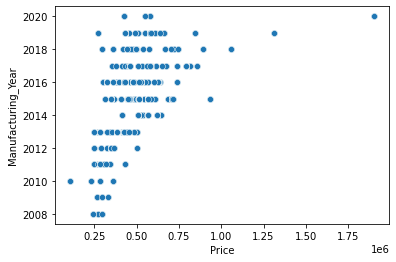

In [63]:
#finding relation between Price and Manufacture year.
sns.scatterplot(x=df['Price'], y =df['Manufacturing_Year'])

<AxesSubplot:xlabel='Price', ylabel='Kms_run'>

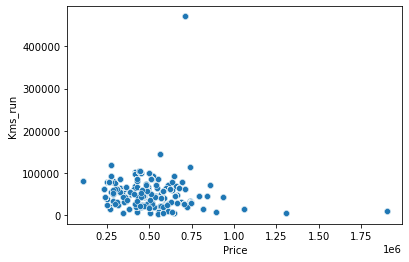

In [68]:
#finding relation between Price and Manufacture year.
sns.scatterplot(x=df['Price'], y =df['Kms_run'],markers  = False)

<AxesSubplot:xlabel='Price', ylabel='Engine'>

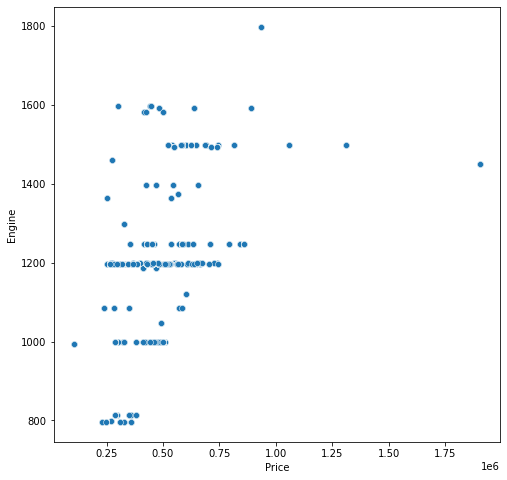

In [110]:
plt.figure(figsize=[8,8])
sns.scatterplot(x=df['Price'], y =df['Engine'],markers  = False)

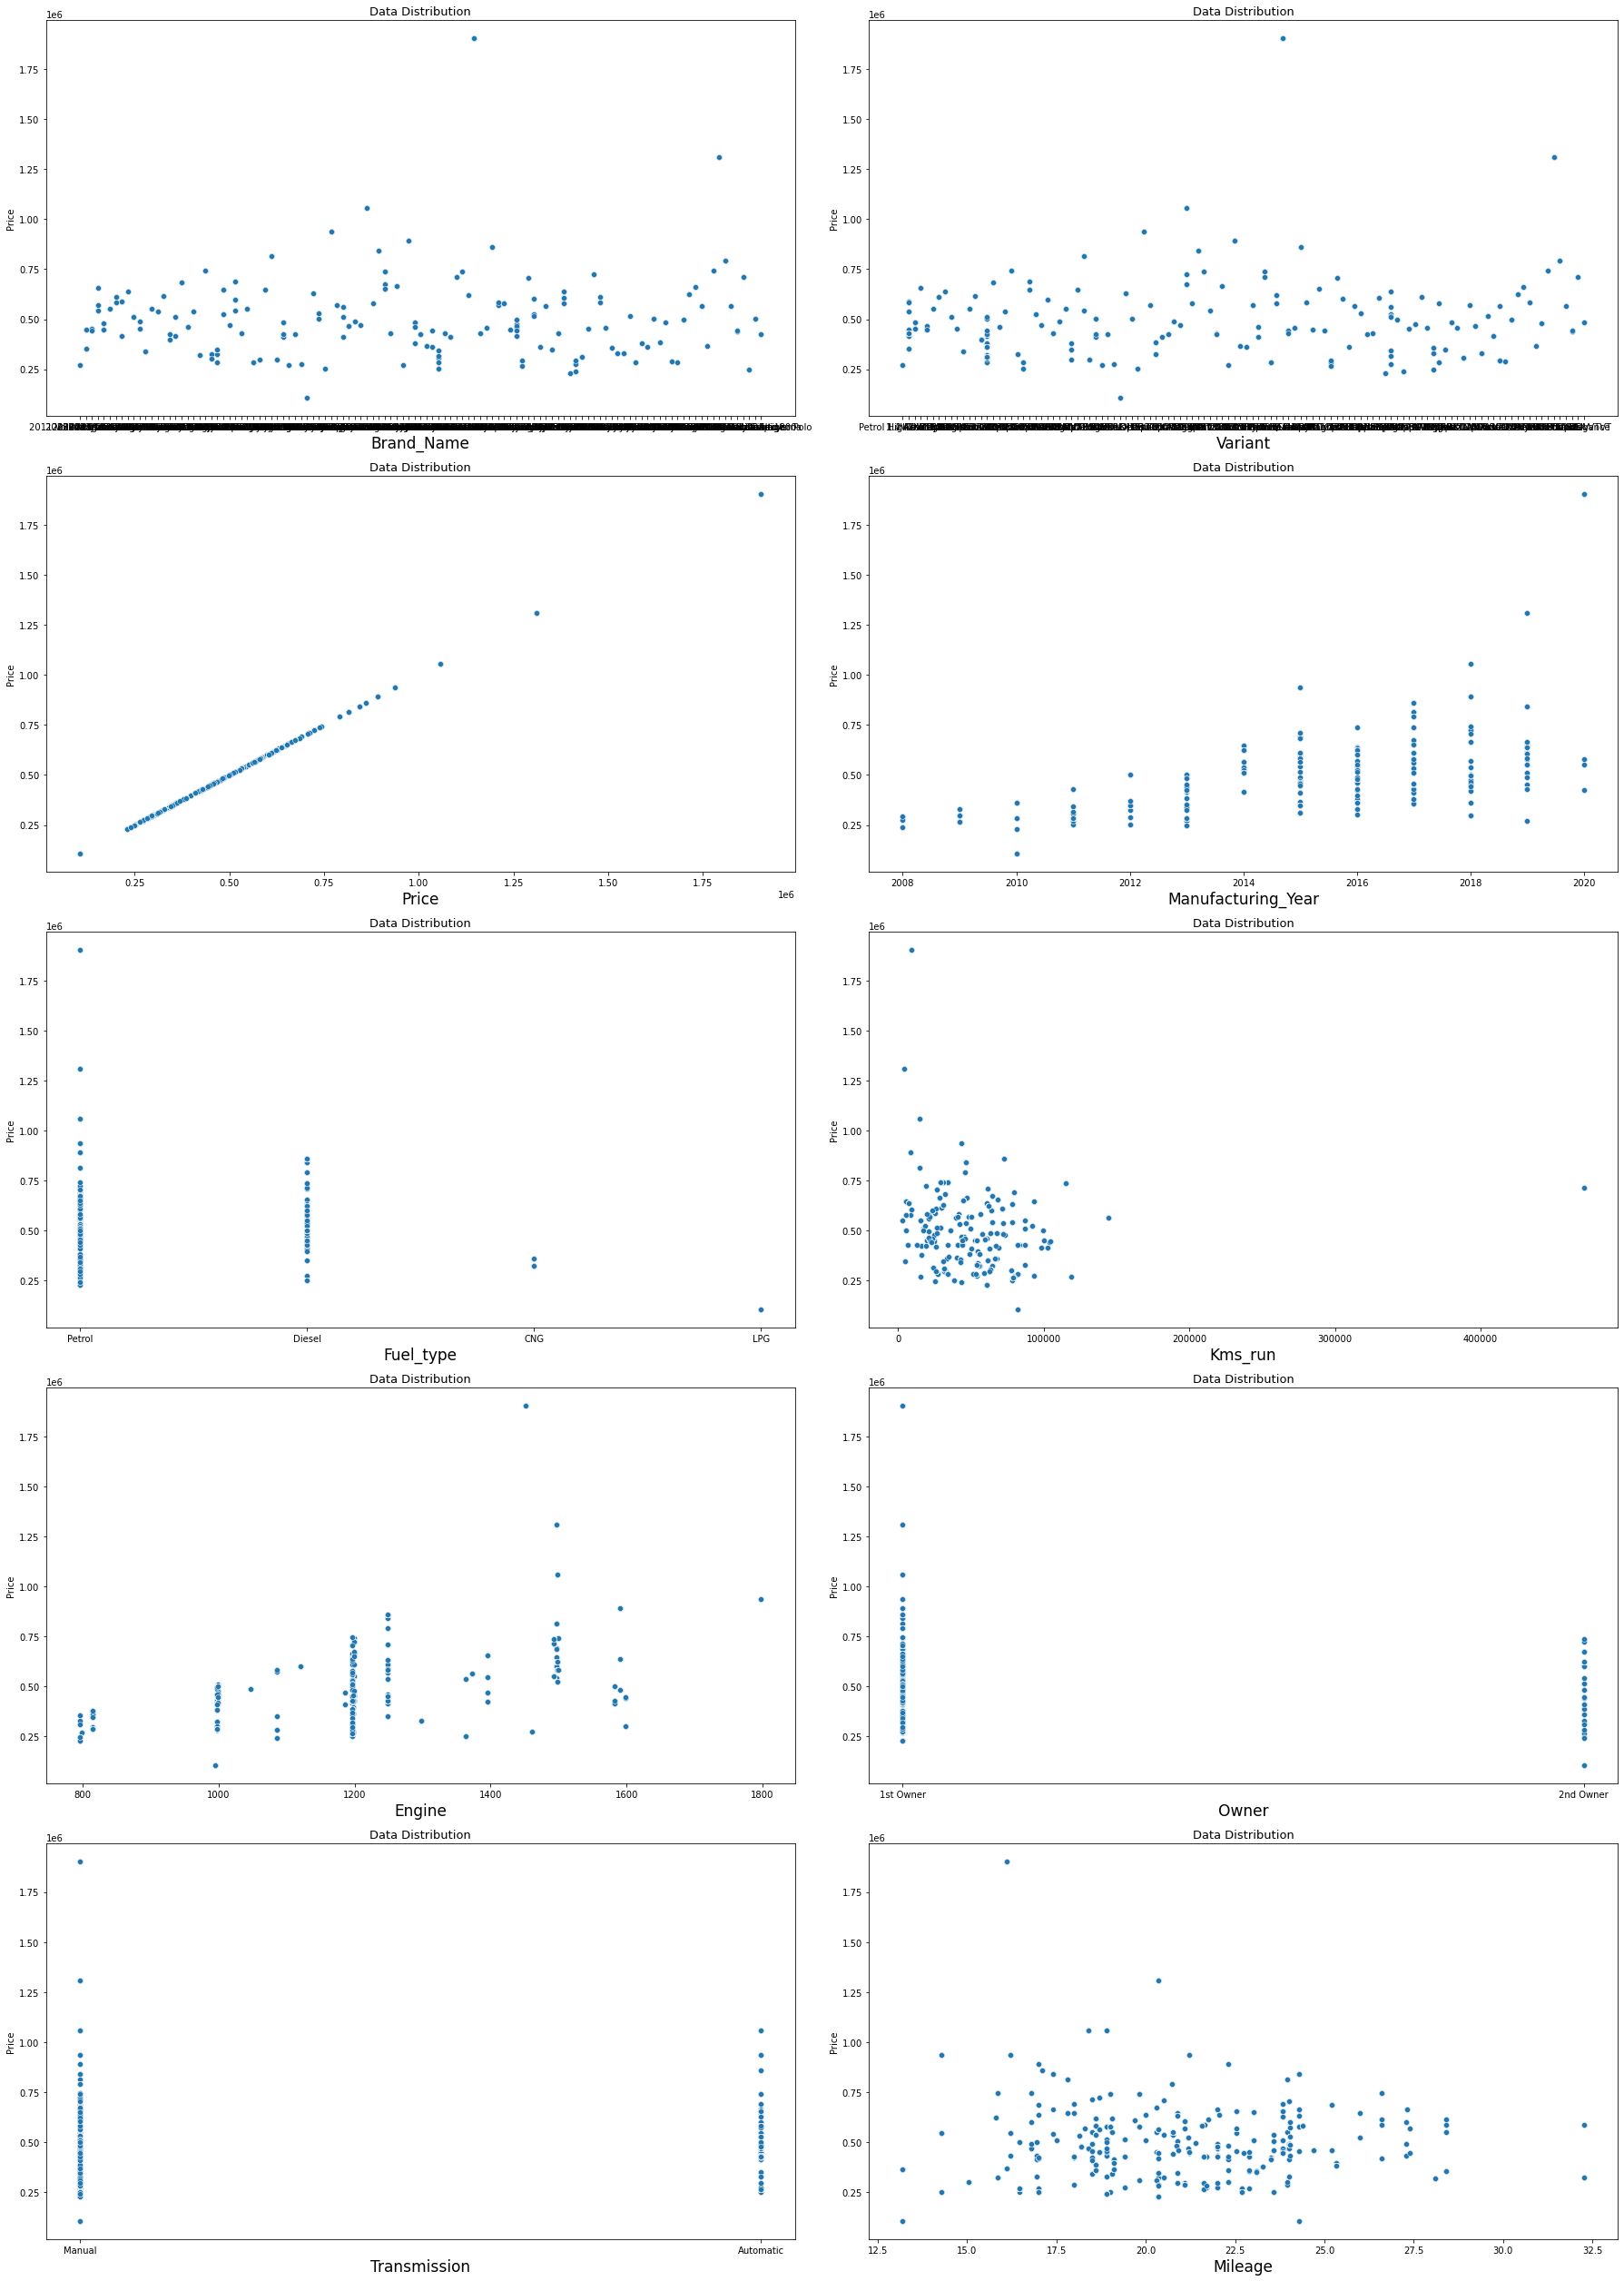

In [111]:
#Lets now plot scatter plot for each column in x with respect to y to understand the data.

plt.figure(figsize = [25,35])
plotnumber = 1

for column in df:
    if plotnumber<=10:
        ax = plt.subplot(5,2,plotnumber)
        sns.scatterplot(x = df[column], y= df['Price'])
        plt.xlabel(column, fontsize = 17)
        plt.title("Data Distribution", fontsize = 13)
    plotnumber += 1
plt.tight_layout()

<AxesSubplot:xlabel='Manufacturing_Year', ylabel='count'>

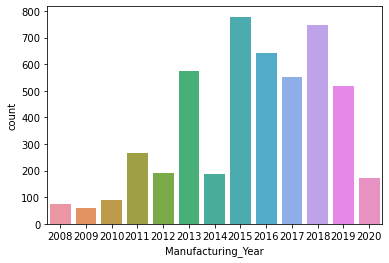

In [42]:
sns.countplot(x=df['Manufacturing_Year'],)

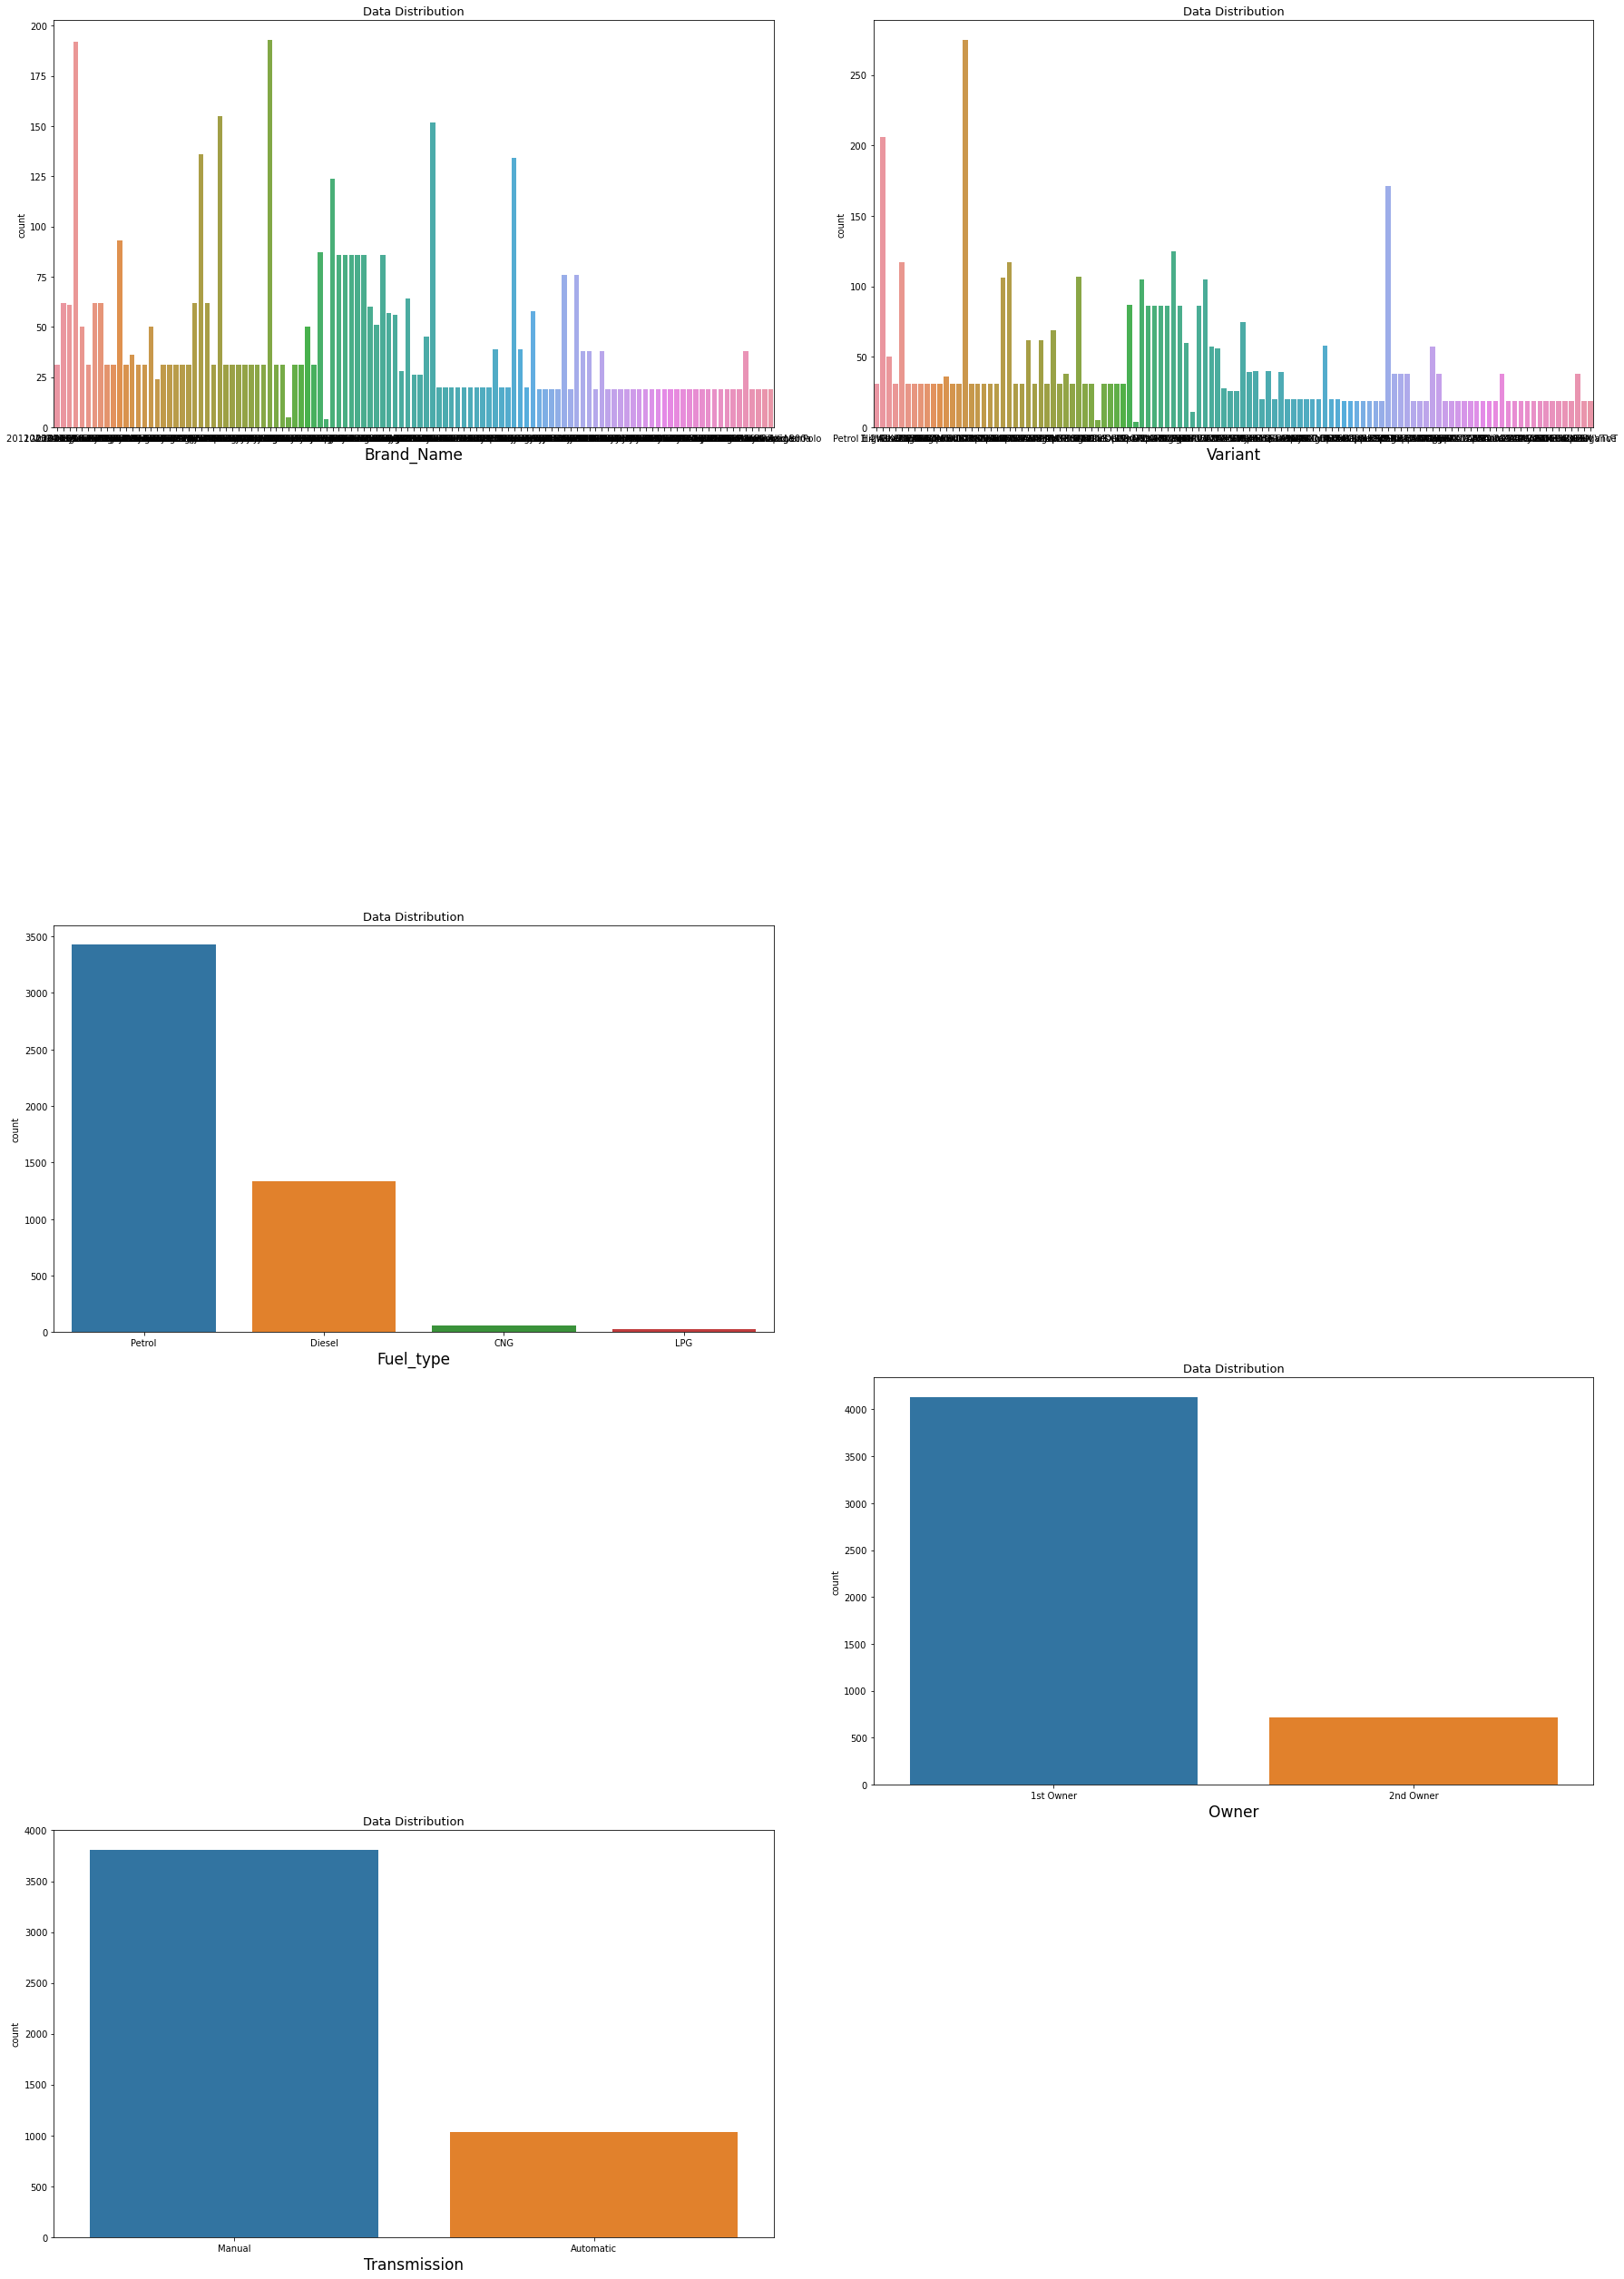

In [112]:
plt.figure(figsize=[25,35])

plotnumber = 1

for column in df:
    if df[column].dtypes=="object" and plotnumber<=10:
        ax = plt.subplot(5,2,plotnumber)
        sns.countplot(x=df[column],)
        plt.xlabel(column,fontsize=17)
        plt.title("Data Distribution", fontsize = 13)
    plotnumber+=1
plt.tight_layout()

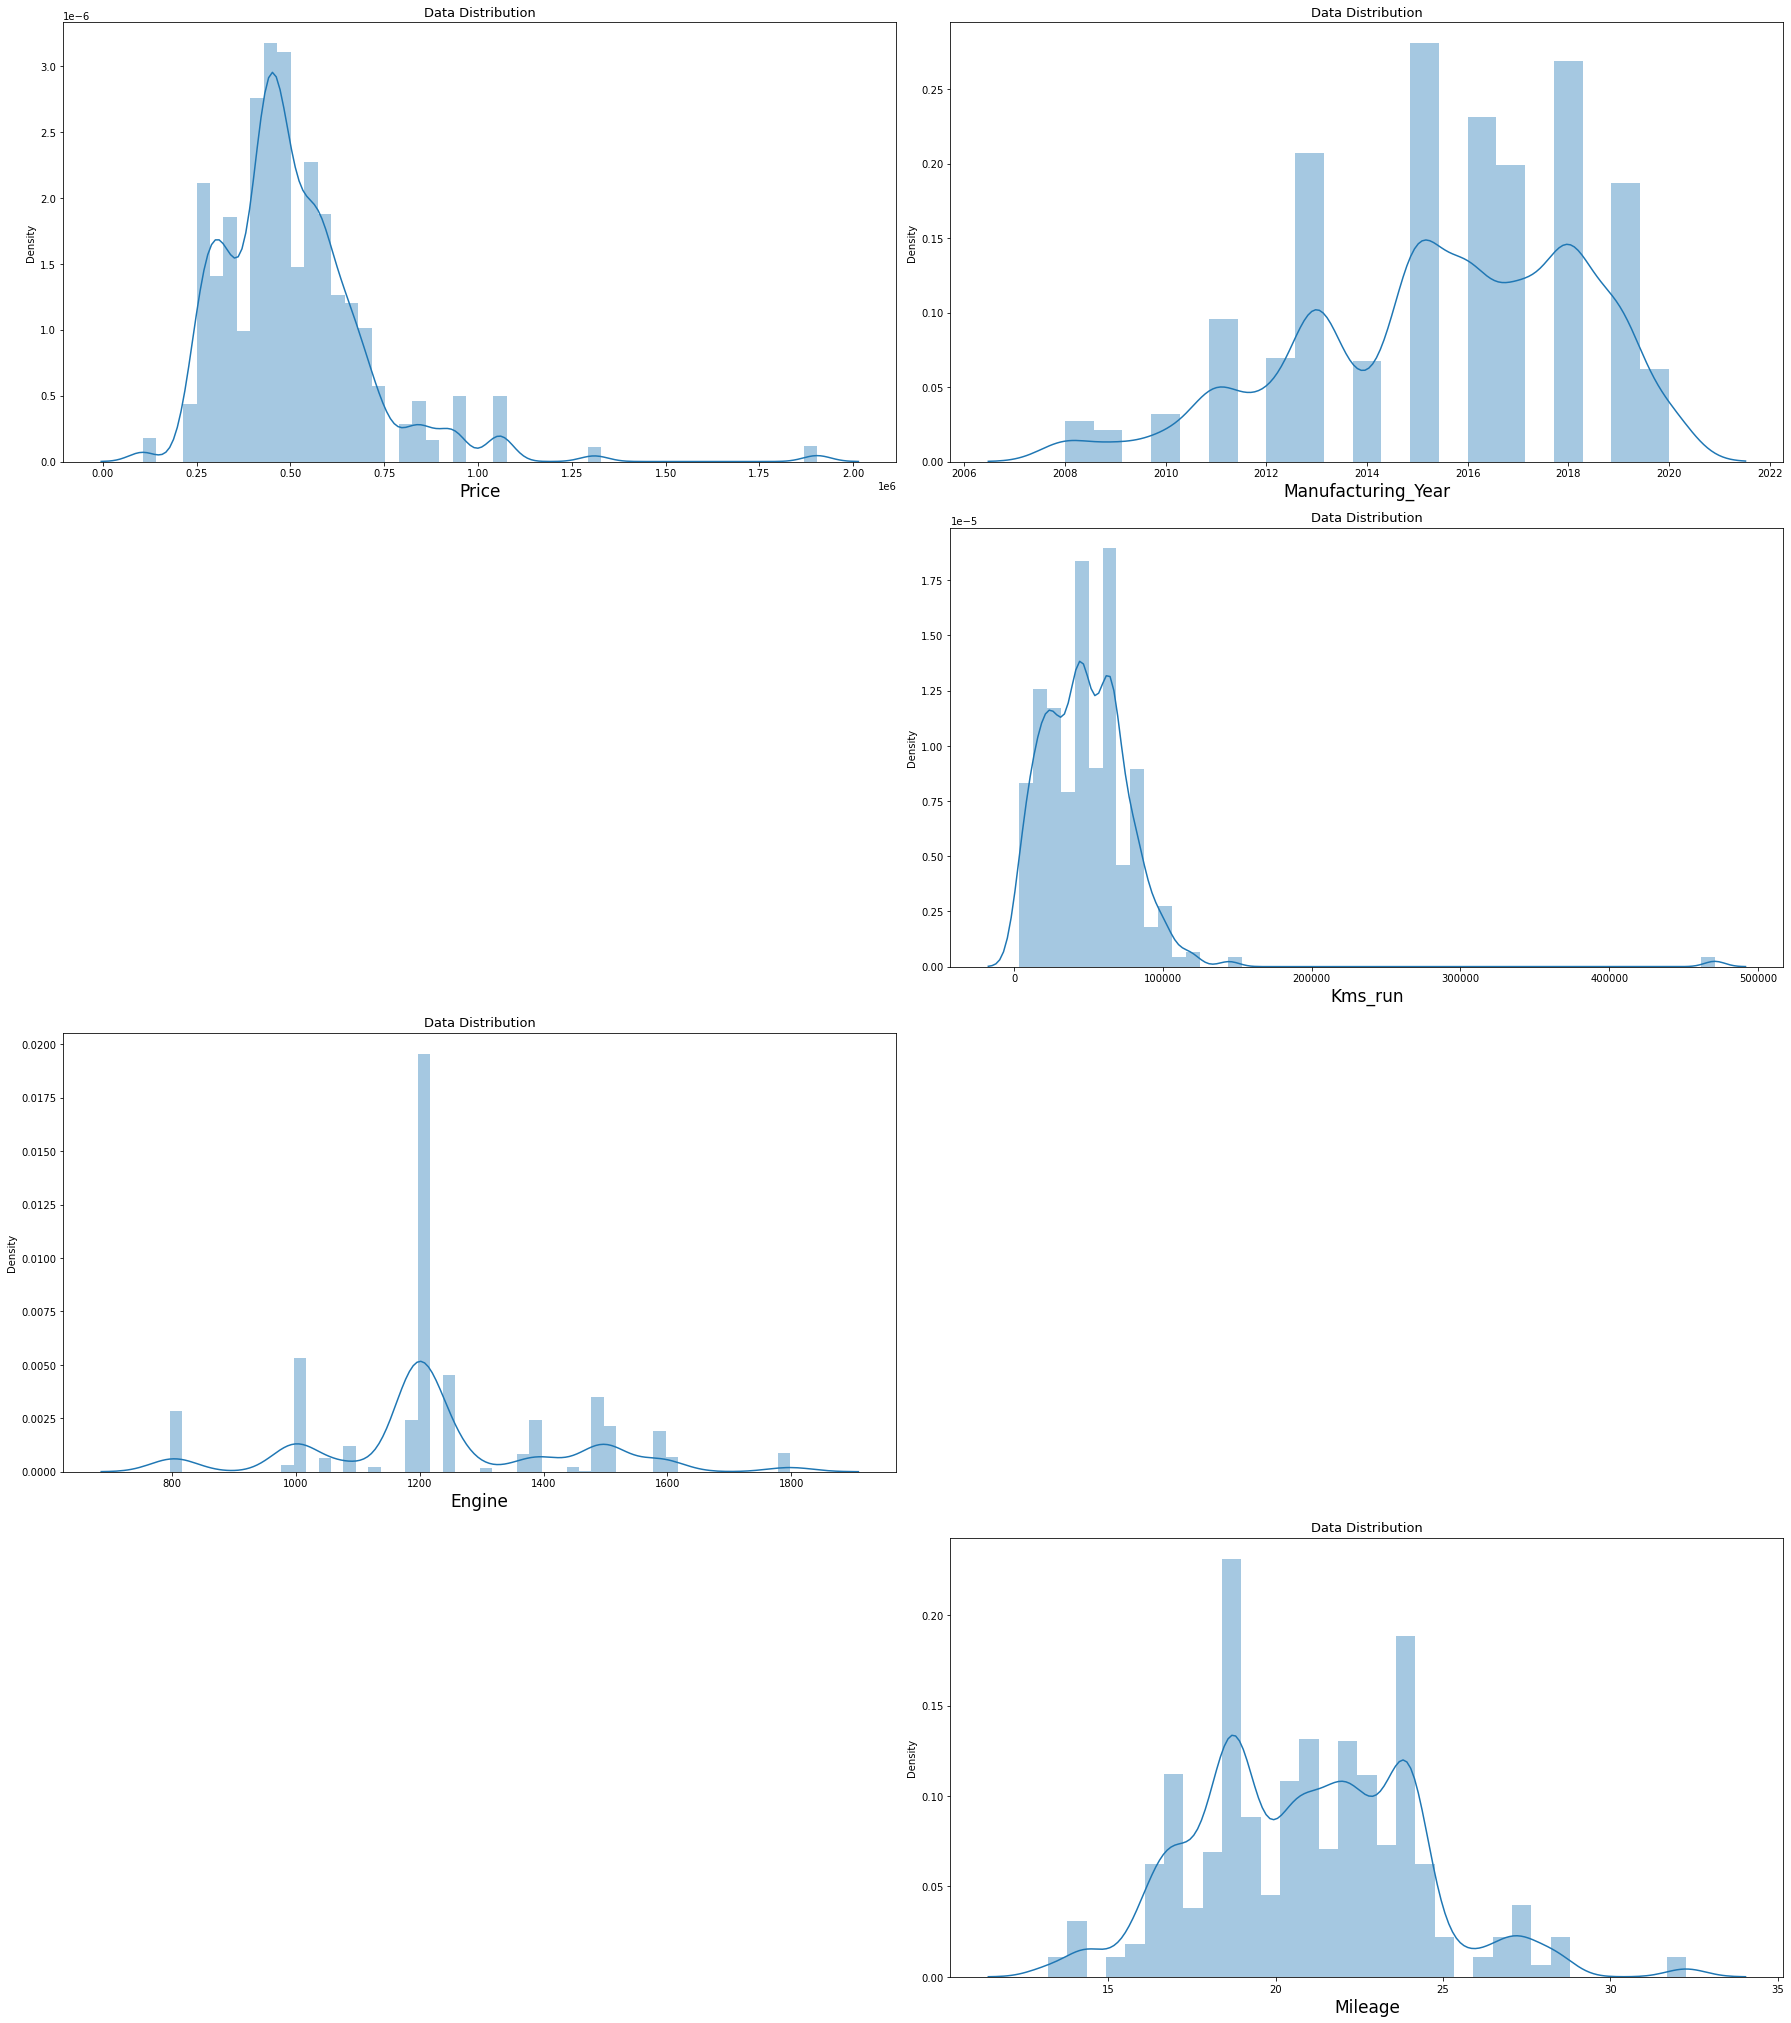

In [114]:
plt.figure(figsize=[25,35])
plotnumber = 1

for column in df:
    if df[column].dtypes=="int64" or df[column].dtypes=="float64" and plotnumber<=10:
        ax = plt.subplot(5,2,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=17)
        plt.title("Data Distribution", fontsize = 13)
    plotnumber+=1
plt.tight_layout()

In [115]:
df.skew()

Price                 2.095412
Manufacturing_Year   -0.560444
Kms_run               5.889215
Engine                0.254115
Mileage               0.310137
dtype: float64

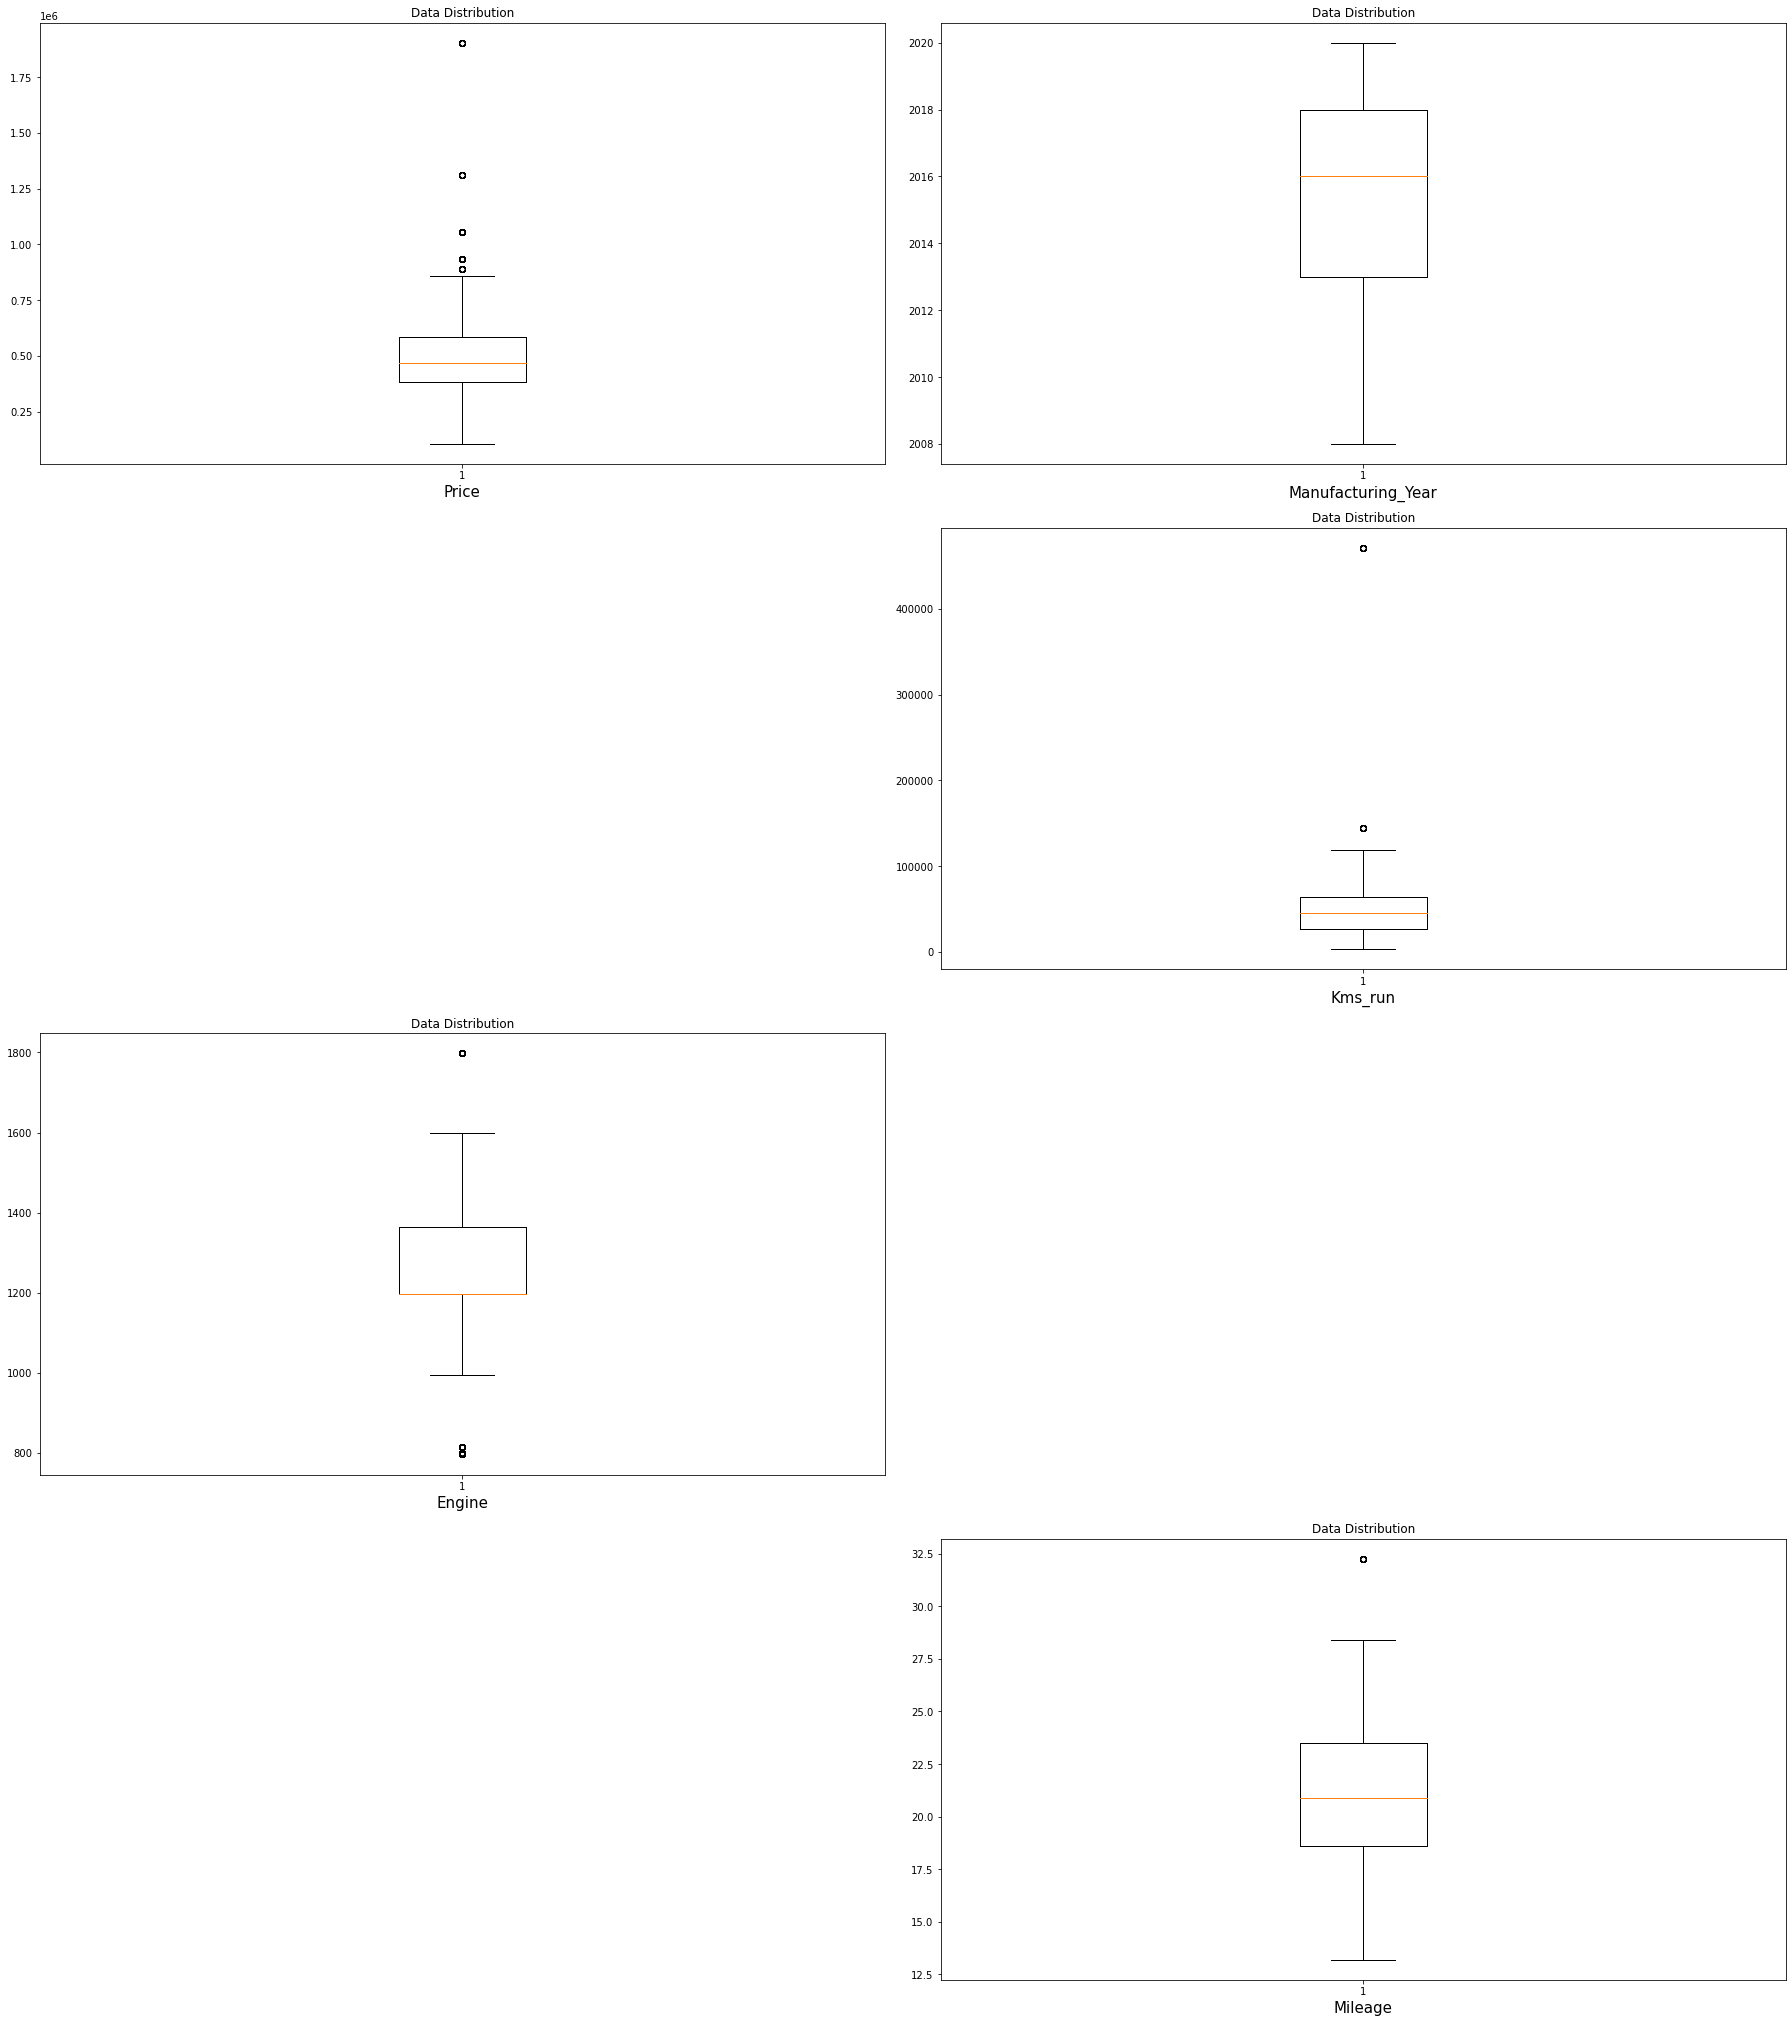

In [43]:
#Checking for outliers in the dataset.

plt.figure(figsize = [25,35])
plotnumber = 1

for column in df:
    if df[column].dtypes=="int64" or df[column].dtypes=="float64" and plotnumber<=10:
        ax = plt.subplot(5,2,plotnumber)
        plt.boxplot(x = df[column])
        plt.xlabel(column, fontsize = 15)
        plt.title("Data Distribution", fontsize = 12)
    plotnumber += 1
plt.tight_layout()

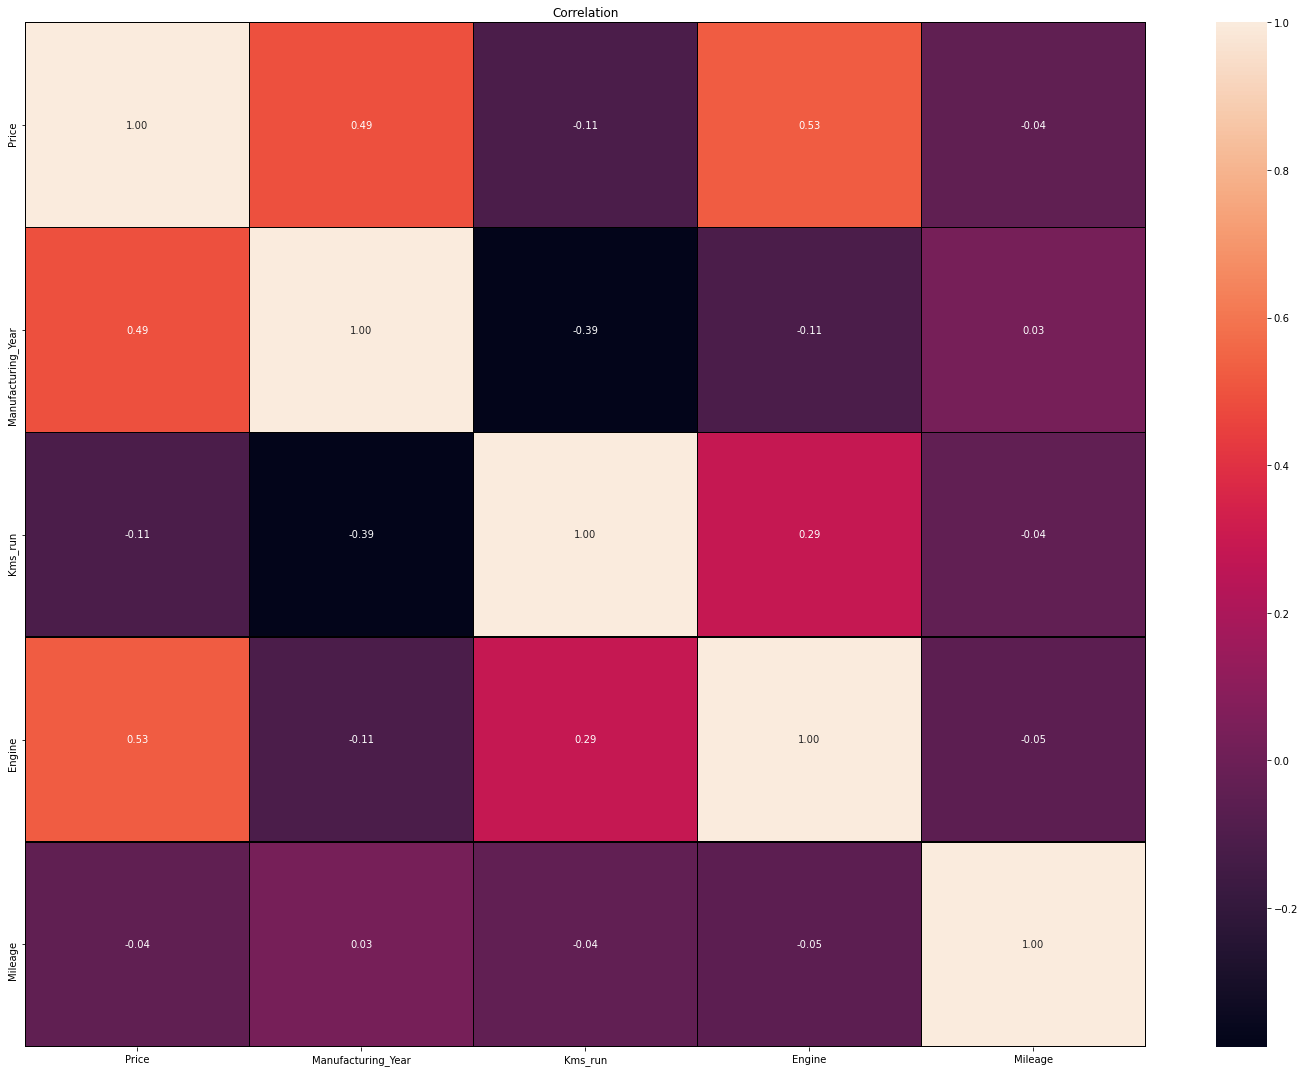

In [117]:
plt.figure(figsize = [20,15])
sns.heatmap(df.corr(),annot=True, linewidths=0.3,linecolor="black",fmt='.2f')
plt.title('Correlation')
plt.tight_layout()

In [44]:
q = df['Kms_run'].quantile(0.98)
df = df[df['Kms_run']<q]

In [45]:
df.skew()

Price                 2.137345
Manufacturing_Year   -0.586174
Kms_run               0.144022
Engine                0.278359
Mileage               0.305894
dtype: float64

In [11]:
df.head()

,Brand_Name,Variant,Price,Manufacturing_Year,Fuel_type,Kms_run,Engine,Owner,Transmission,Mileage
801,2013 Maruti Swift,VDI,450000,2013,Diesel,99877,1248,1st Owner,Manual,22.90
802,2016 Maruti Swift,ZXI,453948,2015,Petrol,52655,1197,1st Owner,Manual,21.21
803,2017 Hyundai i20,1.4 Asta Option,655500,2017,Diesel,68644,1396,1st Owner,Manual,22.54
804,2017 Tata Tiago,1.2 Revotron XZA,450000,2017,Petrol,19544,1199,1st Owner,Automatic,23.84
805,2019 Tata Tigor,XZ Plus,550500,2019,Petrol,15681,1199,1st Owner,Manual,20.30


In [46]:
x = df.drop(['Price','Brand_Name','Variant'], axis = 1)
y = df['Price']

In [47]:
### Now Will remove outliers with the help of Z-score Method.

from scipy import stats

for column in x:
    if x[column].dtypes=="int64" or x[column].dtypes=="float64":
        z = np.abs(stats.zscore(x[column]))
        i = np.where(z>3)[0]
print(z)

[0.61262118 0.09367726 0.50207691 ... 0.33626051 0.95039532 0.05989985]


In [48]:
x = x.drop(x.index[i])
y = y.drop(y.index[i])

In [49]:
#Lets first convert the string values in int for further processing of data with the help of label encoder.

from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()

for i in x.columns:
    if x[i].dtypes=="object":
        x[i] = LE.fit_transform(x[i].values.reshape(-1,1))

**Model Building**

In [50]:
#Scaling the data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [51]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.20, random_state = 100)

In [17]:
import xgboost

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [19]:
LR = LinearRegression()
DT = DecisionTreeRegressor()
RF = RandomForestRegressor()
XGB = XGBRegressor()
ABR = AdaBoostRegressor()

In [55]:
#training with the all of them

LR.fit(x_train,y_train)
DT.fit(x_train,y_train)
RF.fit(x_train,y_train)
XGB.fit(x_train,y_train)
ABR.fit(x_train,y_train)

print("All Models Trained")

All Models Trained


In [56]:
#Accuracy scores
print('Linear Regression =',LR.score(x_train,y_train))
print('Decision Tree =',DT.score(x_train,y_train))
print('Random Forest =',RF.score(x_train,y_train))
print('XGB =',XGB.score(x_train,y_train))
print('Ada Boost Regressor =',ABR.score(x_train,y_train))

Linear Regression = 0.622164014072379
Decision Tree = 1.0
Random Forest = 0.9999931137132598
XGB = 0.9999992095528908
Ada Boost Regressor = 0.8467900042884453


In [57]:
#R2_Scores
from sklearn.metrics import r2_score

print('Linear Regression =', r2_score(y_test,LR.predict(x_test)))
print('Decision Tree =', r2_score(y_test,DT.predict(x_test)))
print('Random Forest =', r2_score(y_test,RF.predict(x_test)))
print('XGB =', r2_score(y_test,XGB.predict(x_test)))
print('Ada Boost Regressor =', r2_score(y_test,ABR.predict(x_test)))

Linear Regression = 0.6184010704568614
Decision Tree = 0.9990260097183263
Random Forest = 0.9991177348339888
XGB = 0.9999874465763755
Ada Boost Regressor = 0.8241623928102685


In [58]:
#Mean Squared Error
print('Linear Regression =', mean_squared_error(y_test,LR.predict(x_test)))
print('Decision Tree =', mean_squared_error(y_test,DT.predict(x_test)))
print('Random Forest =', mean_squared_error(y_test,RF.predict(x_test)))
print('XGB =', mean_squared_error(y_test,XGB.predict(x_test)))
print('Ada Boost Regressor =', mean_squared_error(y_test,ABR.predict(x_test)))

Linear Regression = 12975546000.970554
Decision Tree = 33118687.516985137
Random Forest = 29999749.371253494
XGB = 426855.3004173716
Ada Boost Regressor = 5979023482.907923


In [59]:
#Mean Absolute Error
print('Linear Regression =', mean_absolute_error(y_test,LR.predict(x_test)))
print('Decision Tree =', mean_absolute_error(y_test,DT.predict(x_test)))
print('Random Forest =', mean_absolute_error(y_test,RF.predict(x_test)))
print('XGB =', mean_absolute_error(y_test,XGB.predict(x_test)))
print('Ada Boost Regressor =', mean_absolute_error(y_test,ABR.predict(x_test)))

Linear Regression = 79994.871210399
Decision Tree = 187.50424628450105
Random Forest = 283.81233545647564
XGB = 112.37317542462846
Ada Boost Regressor = 64407.14656101596


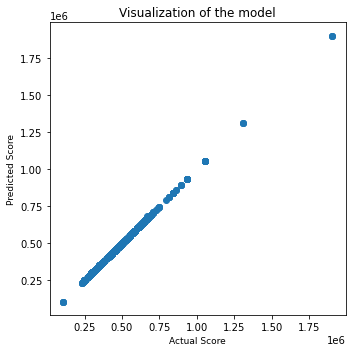

In [62]:
plt.figure(figsize = [5,5])
plt.scatter(y_test,XGB.predict(x_test))
plt.xlabel('Actual Score', fontsize=9)
plt.ylabel('Predicted Score',fontsize=9)
plt.title('Visualization of the model', fontsize = 12)
plt.tight_layout()

In [132]:
#Checking Cross Validation

from sklearn.model_selection import cross_val_score

cvs = cross_val_score(XGB,x_train,y_train,cv=5)

cvs.mean()

0.999984807584245

**HyperParameter Tuning**

In [133]:
from sklearn.model_selection import GridSearchCV

In [170]:
LR_Params = {'copy_X':[True,False],
         'fit_intercept':[True,False],
        'normalize' :[True,False]}

DT_Params = {'criterion':['mse','mae'],
        'splitter': ['best', 'random'],
          'min_samples_leaf': list(range(8,14)),
         'min_samples_split': list(range(8,14)),
         'max_depth':list(range(8,14))}


RF_Params =  {'n_estimators':[140,160],
         'max_depth':list(range(8,14)),
         'min_samples_leaf': list(range(8,14)),
         'min_samples_split': list(range(8,14))}


XGB_Params = {'max_depth':list(range(8,14)),
         'n_estimators':[100,120],
          'learning_rate' :[0.25,0.30],
             'booster':['gbtree','gblinear']}

ABR_Params = {'n_estimators':[100,120],
        'learning_rate' :[0.25,0.30],
          'loss' : ['linear', 'square', 'exponential']}

In [171]:
LR_grid = GridSearchCV(LR, param_grid= LR_Params, cv = 2, n_jobs=-1)

DT_grid = GridSearchCV(DT, param_grid= DT_Params, cv = 2, n_jobs=-1)

RF_grid = GridSearchCV(RF, param_grid= RF_Params, cv = 2, n_jobs=-1)

XGB_grid = GridSearchCV(XGB, param_grid= XGB_Params, cv = 2, n_jobs=-1)

ABR_grid = GridSearchCV(ABR, param_grid= ABR_Params, cv = 2, n_jobs=-1)

In [172]:
LR_grid.fit(x_train,y_train)

DT_grid.fit(x_train,y_train)

RF_grid.fit(x_train,y_train)

XGB_grid.fit(x_train,y_train)

ABR_grid.fit(x_train,y_train)

GridSearchCV(cv=2, estimator=AdaBoostRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.25, 0.3],
                         'loss': ['linear', 'square', 'exponential'],
                         'n_estimators': [100, 120]})

In [173]:
print('Best Estimators == > \n', LR_grid.best_params_)
print('Best Estimators == > \n', DT_grid.best_params_)
print('Best Estimators == > \n', RF_grid.best_params_)
print('Best Estimators == > \n', ABR_grid.best_params_)

Best Estimators == > 
 {'copy_X': True, 'fit_intercept': True, 'normalize': True}
Best Estimators == > 
 {'criterion': 'mse', 'max_depth': 13, 'min_samples_leaf': 8, 'min_samples_split': 9, 'splitter': 'best'}
Best Estimators == > 
 {'max_depth': 13, 'min_samples_leaf': 8, 'min_samples_split': 13, 'n_estimators': 160}
Best Estimators == > 
 {'learning_rate': 0.25, 'loss': 'exponential', 'n_estimators': 120}


In [174]:
LR_clf= LR_grid.best_estimator_

DT_clf= DT_grid.best_estimator_

RF_clf= RF_grid.best_estimator_

XGB_clf= XGB_grid.best_estimator_

ABR_clf= ABR_grid.best_estimator_

In [175]:
print("Linear Regression",LR_clf.fit(x_train, y_train))
print("Decision Tree Regression",DT_clf.fit(x_train, y_train))
print("Random Forest Regression",RF_clf.fit(x_train, y_train))
print("XGB Regression",XGB_clf.fit(x_train, y_train))
print("Adaboost Regression",ABR_clf.fit(x_train, y_train))

Linear Regression LinearRegression(normalize=True)
Decision Tree Regression DecisionTreeRegressor(max_depth=13, min_samples_leaf=8, min_samples_split=9)
Random Forest Regression RandomForestRegressor(max_depth=13, min_samples_leaf=8, min_samples_split=13,
                      n_estimators=160)
XGB Regression XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.25, max_delta_step=0, max_depth=13,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)
Adaboost Regression AdaBoostRegressor(learning_rate=0.25, loss='exponential', n_estimators=120)


In [176]:
#Accuracy scores
print('Linear Regression =',LR_clf.score(x_test,y_test))
print('Decision Tree =',DT_clf.score(x_test,y_test))
print('Random Forest =',RF_clf.score(x_test,y_test))
print('XGB =',XGB_clf.score(x_test,y_test))
print('Ada Boost Regressor =',ABR_clf.score(x_test,y_test))

Linear Regression = 0.6184010704568614
Decision Tree = 0.997476342908472
Random Forest = 0.9966972170602737
XGB = 0.9999487072318471
Ada Boost Regressor = 0.8290315814531479


In [178]:
#Accuracy score
print('Linear Regression =', mean_squared_error(y_test,LR_clf.predict(x_test)))
print('Decision Tree =', mean_squared_error(y_test,DT_clf.predict(x_test)))
print('Random Forest =', mean_squared_error(y_test,RF_clf.predict(x_test)))
print('SVC =', mean_squared_error(y_test,XGB_clf.predict(x_test)))
print('Ada Boost Regressor =', mean_squared_error(y_test,ABR_clf.predict(x_test)))

Linear Regression = 12975546000.970552
Decision Tree = 85812160.74426964
Random Forest = 112304853.7294048
SVC = 1744113.0494830543
Ada Boost Regressor = 5813455981.7130785


In [180]:
# Checking Cross Validation Score
from sklearn.model_selection import cross_val_score

cvs_svc = cross_val_score(XGB_clf,x,y,cv=3)

cvs_svc.mean()

0.9784646130214799

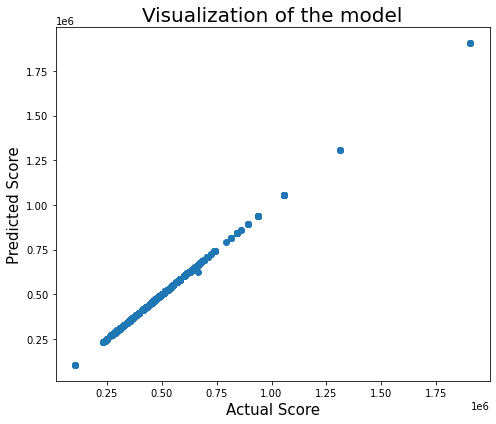

In [181]:
plt.figure(figsize = [7,6])
plt.scatter(y_test,XGB_clf.predict(x_test))
plt.xlabel('Actual Score', fontsize=15)
plt.ylabel('Predicted Score',fontsize=15)
plt.title('Visualization of the model', fontsize = 20)
plt.tight_layout()

**Saving The Model**

In [182]:
import joblib
filename = 'Used_Cars_Price.sav'
joblib.dump(XGB, filename)

['Used_Cars_Price.sav']